<a href="https://colab.research.google.com/github/AzlinRusnan/Optimizing-Customer-Satisfaction-CSAT-Through-Sentiment-Analysis-and-Predictive-ML-Techniques/blob/main/Optimizing_CSAT_Through_VADER_Sentiment_Analysis_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [17]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00


In [18]:
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [21]:
file_path = '/content/gdrive/MyDrive/Sentiment Analysis_cleaned_dataset_2.0.xlsx'
xls = pd.ExcelFile(file_path)

# Check sheet names to understand the structure
xls.sheet_names

['Sheet1']

In [22]:
# Load the data from the first sheet
mismatch_data = pd.read_excel(xls, sheet_name='Sheet1')

mismatch_data.head()

filtered_dataset = mismatch_data[
    (mismatch_data['Language'] == 'english') &
    (mismatch_data['USS Comment'].notnull())
]

filtered_dataset.head()

Exception ignored in: <function ZipFile.__del__ at 0x7849c275a8c0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/zipfile.py", line 1834, in __del__
    self.close()
  File "/usr/lib/python3.10/zipfile.py", line 1851, in close
    self.fp.seek(self.start_dir)
ValueError: seek of closed file


,Number,City,Country,Region,Average Response (calculated),USS Comment,String value,Year,Month-Year,Language
1,INC19297125,Greensboro,United States of America,NORTH AMERICA,1,Thanks for punctual and quick service resolvin...,Very Satisfied,2024,Oct/2024,english
4,INC19295496,Pune,India,APAC,1,Prompt response,Very Satisfied,2024,Oct/2024,english
6,INC19295442,Pune,India,APAC,1,Quick support,Very Satisfied,2024,Oct/2024,english
10,INC19296419,Guildford,United Kingdom,EAME,1,Andre provided excellent support He used Teams...,Very Satisfied,2024,Oct/2024,english
11,INC19296218,Toronto,Canada,NORTH AMERICA,1,Assistance was immediate and resolved my issue...,Very Satisfied,2024,Oct/2024,english


In [23]:
#create an instance of SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [25]:
filtered_dataset['Sentiment'] = filtered_dataset['USS Comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


<ipython-input-25-70766541e481>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Sentiment'] = filtered_dataset['USS Comment'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [26]:
# Categorize the sentiment scores
filtered_dataset['Sentiment Category'] = filtered_dataset['Sentiment'].apply(
    lambda score: 'Positive' if score > 0.05 else ('Negative' if score < -0.05 else 'Neutral')
)

<ipython-input-26-11143c8192bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Sentiment Category'] = filtered_dataset['Sentiment'].apply(


In [27]:
filtered_dataset.head()

,Number,City,Country,Region,Average Response (calculated),USS Comment,String value,Year,Month-Year,Language,Sentiment,Sentiment Category
1,INC19297125,Greensboro,United States of America,NORTH AMERICA,1,Thanks for punctual and quick service resolvin...,Very Satisfied,2024,Oct/2024,english,0.6996,Positive
4,INC19295496,Pune,India,APAC,1,Prompt response,Very Satisfied,2024,Oct/2024,english,0.0000,Neutral
6,INC19295442,Pune,India,APAC,1,Quick support,Very Satisfied,2024,Oct/2024,english,0.4019,Positive
10,INC19296419,Guildford,United Kingdom,EAME,1,Andre provided excellent support He used Teams...,Very Satisfied,2024,Oct/2024,english,0.6808,Positive
11,INC19296218,Toronto,Canada,NORTH AMERICA,1,Assistance was immediate and resolved my issue...,Very Satisfied,2024,Oct/2024,english,0.5267,Positive


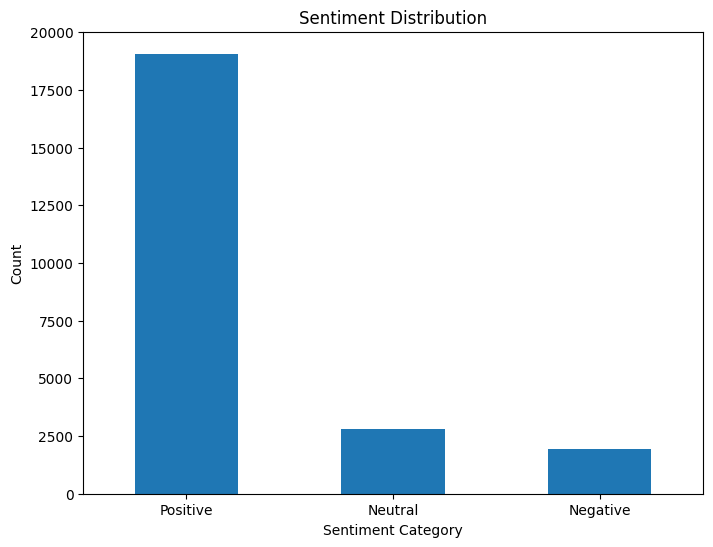

In [30]:
import matplotlib.pyplot as plt

# Ensure the DataFrame has the necessary 'Sentiment Category' column
if 'Sentiment Category' in filtered_dataset.columns:
    # Count occurrences of each sentiment category
    sentiment_counts = filtered_dataset['Sentiment Category'].value_counts()

    # Plot the sentiment distribution
    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment Category')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("The 'Sentiment Category' column is missing. Please ensure sentiment analysis is completed.")


In [28]:
filtered_dataset.to_excel('output_with_verda_sentiment_extended_2.1.xlsx', index=False)

from google.colab import files
files.download('output_with_verda_sentiment_extended_2.1.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>